# Sales_data Analysis with Python

In [55]:
import os
import glob
import pandas as pd

## Merging the 12 Months worth of Sales Data

In [56]:
#Accessing the Sales_data folder

Sales_data= os.getcwd()

extension = 'csv'

In [57]:
#reading all files in the directory as a list
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


In [58]:
#Concatenating all files read from the directory
all_months = pd.concat([pd.read_csv(f) for f in all_filenames])

#putting all the concatenated data in one single csv file
all_months.to_csv("all_data.csv", index = False, encoding = "utf-8-sig")

In [59]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning

### Dropping rows of NaN

In [63]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')  
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [66]:
#checking data wih invalid value type of Month Column
temp_df = all_data[all_data['Order Date'].str[0:2]== 'Or']


#resetting all the data to remove the invalid valus
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

### Converting types to the correct types

In [67]:
all_data['Quantity Ordered'] =  pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Adding month column

In [68]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas(TX),4


### Adding Sales column

In [69]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas(TX),4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston(MA),4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99


### Adding City Column

In [70]:
#lets use apply method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
#Using f strings to get city and state from thhe purchase address
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")  #Alternatively you can use this other method get_city(x) + '('+ get_state(x) + ')' )
#lets drop the column we created accidentally
#all_data = all_data.drop(columns = 'column')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas(TX),4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston(MA),4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99


## Finding out Answers to the Objectives

### Question 1: What is the best months for sales? How much Was earned that month?

In [111]:
results = all_data.groupby('Month').sum()

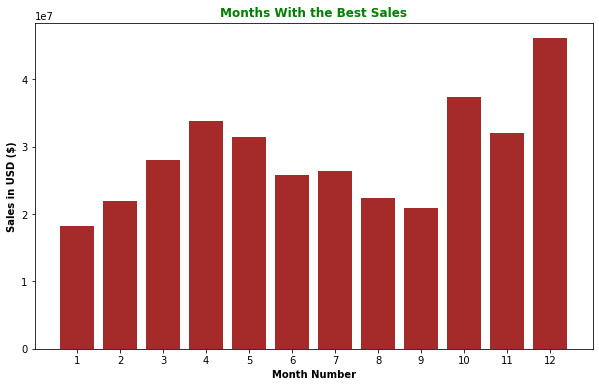

In [112]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'],color = 'brown' )
plt.xticks(months)
plt.ylabel('Sales in USD ($)',fontweight = 'bold')
plt.xlabel('Month Number',fontweight = 'bold')
plt.title('Months With the Best Sales', fontweight = 'bold', color = 'green')
plt.show()




### Question 2: What city sold the most product?

In [114]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hour
City,,,,,
Atlanta(GA),166020,2.779908e+07,1047940,2.795499e+07,2142640
Austin(TX),111530,1.809874e+07,698290,1.819582e+07,1419460
Boston(MA),225280,3.637410e+07,1411120,3.661642e+07,2882250
Dallas(TX),167300,2.752628e+07,1046200,2.767975e+07,2143900
Los Angeles(CA),332890,5.421435e+07,2083250,5.452571e+07,4274440
New York City(NY),279320,4.635371e+07,1757410,4.664317e+07,3576960
Portland(ME),27500,4.471893e+06,171440,4.497583e+06,352110
Portland(OR),113030,1.860558e+07,706210,1.870732e+07,1444210
San Francisco(CA),502390,8.211462e+07,3155200,8.262204e+07,6432650


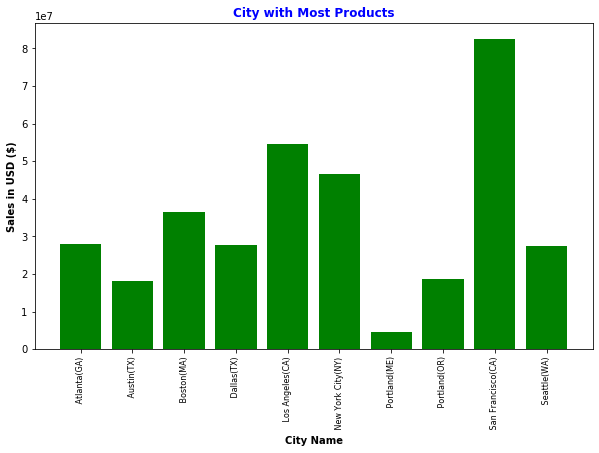

In [116]:
import matplotlib.pyplot as plt

Cities = [City for City, df in all_data.groupby('City')]

plt.rcParams['figure.figsize'] = (10,6)
plt.bar(Cities, results['Sales'], color = 'green')
plt.xticks(Cities, rotation= 'vertical', size = 8)
plt.ylabel('Sales in USD ($)',fontweight = 'bold')
plt.xlabel('City Name', fontweight = 'bold')
plt.title('City with Most Products', fontweight = 'bold', color = 'blue')
plt.show()


### Question 3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [93]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas(TX),4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston(MA),4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99


In [95]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas(TX),4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston(MA),4,99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles(CA),4,11.99,9


In [96]:
results= all_data.groupby('Hour').count()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales
Hour,,,,,,,,,
0,39100,39100,39100,39100,39100,39100,39100,39100,39100
1,23500,23500,23500,23500,23500,23500,23500,23500,23500
2,12430,12430,12430,12430,12430,12430,12430,12430,12430
3,8310,8310,8310,8310,8310,8310,8310,8310,8310
4,8540,8540,8540,8540,8540,8540,8540,8540,8540
5,13210,13210,13210,13210,13210,13210,13210,13210,13210
6,24820,24820,24820,24820,24820,24820,24820,24820,24820
7,40110,40110,40110,40110,40110,40110,40110,40110,40110
8,62560,62560,62560,62560,62560,62560,62560,62560,62560


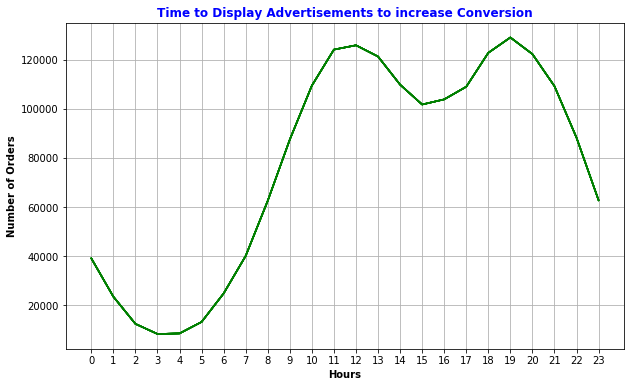

In [100]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(), color = 'green', linewidth = '1.5' )
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of Orders',fontweight = 'bold')
plt.xlabel('Hours',fontweight = 'bold')
plt.title('Time to Display Advertisements to increase Conversion', fontweight = 'bold', color = 'blue')
plt.show()




### Question 4: What products are most often sold together?

In [101]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df.head(100)


,Order ID,Grouped
0,176558,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
7,176563,"Bose SoundSport Headphones,Bose SoundSport Hea..."
8,176564,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
9,176565,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
10,176566,"Wired Headphones,Wired Headphones,Wired Headph..."
11,176567,"Google Phone,Google Phone,Google Phone,Google ..."


In [102]:
from itertools import combinations
from collections import Counter


count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for key, value in count.most_common(20):
    print(key,value)





('USB-C Charging Cable', 'USB-C Charging Cable', 'USB-C Charging Cable') 2671560
('Lightning Charging Cable', 'Lightning Charging Cable', 'Lightning Charging Cable') 2647560
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 2520120
('AA Batteries (4-pack)', 'AA Batteries (4-pack)', 'AA Batteries (4-pack)') 2500740
('Wired Headphones', 'Wired Headphones', 'Wired Headphones') 2297340
('Apple Airpods Headphones', 'Apple Airpods Headphones', 'Apple Airpods Headphones') 1887480
('Bose SoundSport Headphones', 'Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1623300
('27in FHD Monitor', '27in FHD Monitor', '27in FHD Monitor') 908940
('iPhone', 'iPhone', 'iPhone') 822840
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 752100
('34in Ultrawide Monitor', '34in Ultrawide Monitor', '34in Ultrawide Monitor') 748020
('Google Phone', 'Google Phone', 'Google Phone') 665700
('Flatscreen TV', 'Flatscreen TV', 'Flatscreen TV') 581400
(

### Question 5: What product sold the most? Why do you think it sold the most?


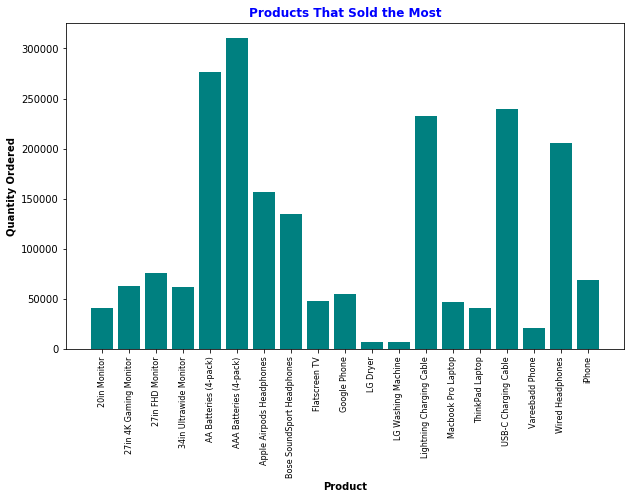

In [104]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered,color = 'teal')
plt.ylabel('Quantity Ordered',fontweight = 'bold')
plt.xlabel('Product',fontweight = 'bold')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.title('Products That Sold the Most', fontweight = 'bold', color = 'blue')
plt.show()



In [105]:
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


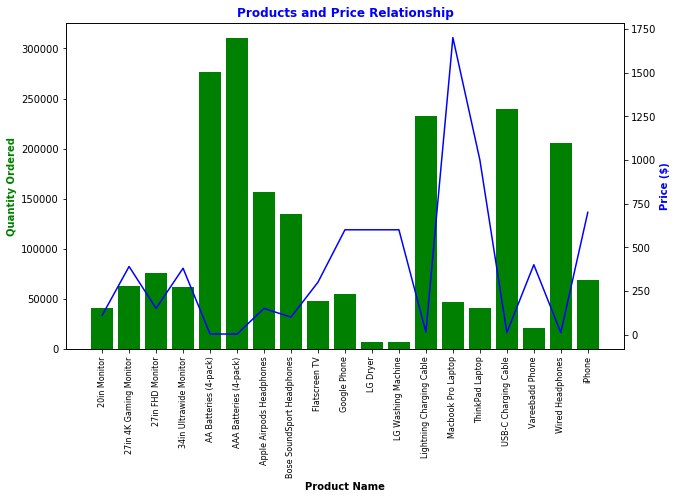

In [109]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')




ax1.set_xlabel('Product Name', fontweight = 'bold')
ax1.set_ylabel('Quantity Ordered', color = 'g', fontweight = 'bold')
ax2.set_ylabel('Price ($)', color = 'b',fontweight = 'bold')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.title('Products and Price Relationship', fontweight = 'bold', color = 'blue')
plt.show()
